In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import geopandas
import descartes

In [8]:
path = "/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/"
SET3_M01 = pd.read_csv(path + "SET3/SET3_M01.CSV", header = None, 
                       names = ["user_id", "timestamp", "arrondissement_id"])

In [9]:
map_senegal = geopandas.read_file(path + "ContextData/Shapefile_Senegal/senegal_arr_2014_wgs.shp")

In [10]:
map_senegal['centroid'] = map_senegal['geometry'].centroid

Text(0.5, 1, "Senegal's arrondissements with centroids marked as red dots")

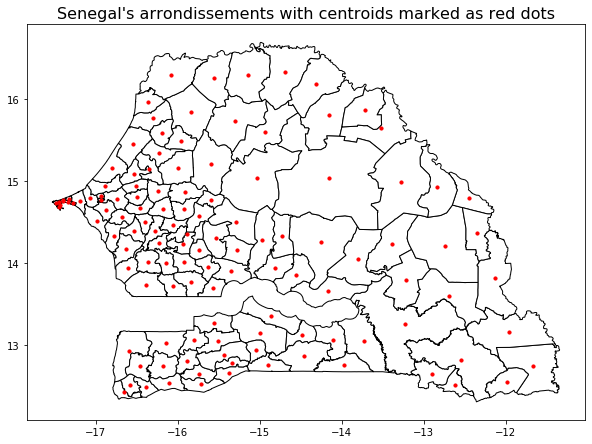

In [35]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_aspect('equal')
map_senegal.plot(ax=ax, color='white', edgecolor='black')
map_senegal.centroid.plot(ax=ax, marker='o', color='red', markersize = 10)
plt.title("Senegal's arrondissements with centroids marked as red dots", fontsize = 16)

In [2]:
pref_arr_df = pd.read_csv("/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/SET3/MO1_pref_arr.csv", 
                       header = None, names = ["user_id", "date", "pref_arr"])

In [3]:
pref_arr_df.head()

,user_id,date,pref_arr
0,1,2013-01-01,1
1,1,2013-01-02,4
2,1,2013-01-03,1
3,1,2013-01-04,4
4,1,2013-01-05,1


In [4]:
pref_arr_df['date'] = pd.to_datetime(pref_arr_df['date'])

In [5]:
pref_arr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023935 entries, 0 to 4023934
Data columns (total 3 columns):
user_id     int64
date        datetime64[ns]
pref_arr    int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 92.1 MB


In [11]:
pref_arr_geom = pref_arr_df.merge(map_senegal, left_on = "pref_arr", right_on = "ARR_ID")

In [12]:
pref_arr_geom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023935 entries, 0 to 4023934
Data columns (total 9 columns):
user_id     int64
date        datetime64[ns]
pref_arr    int64
ARR_ID      int64
REG         object
DEPT        object
ARR         object
geometry    geometry
centroid    geometry
dtypes: datetime64[ns](1), geometry(2), int64(3), object(3)
memory usage: 307.0+ MB


In [13]:
pref_arr_geom = pref_arr_geom.filter(['user_id', 'date', 'ARR_ID', 'REG', 'ARR', 'centroid'])

In [14]:
pref_arr_geom = geopandas.GeoDataFrame(pref_arr_geom, geometry = "centroid")

In [15]:
pref_arr_geom_u1 = pref_arr_geom[pref_arr_geom.user_id == 1]

In [16]:
pref_arr_geom_u1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26 entries, 0 to 330079
Data columns (total 6 columns):
user_id     26 non-null int64
date        26 non-null datetime64[ns]
ARR_ID      26 non-null int64
REG         26 non-null object
ARR         26 non-null object
centroid    26 non-null geometry
dtypes: datetime64[ns](1), geometry(1), int64(2), object(2)
memory usage: 1.4+ KB


In [21]:
pref_arr_geom_u1.sort_values('date')

,user_id,date,ARR_ID,REG,ARR,centroid,lon,lat
0,1,2013-01-01,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
330074,1,2013-01-02,4,DAKAR,DAKAR PLATEAU,POINT (-17.44917 14.68139),-17.449171,14.681393
1,1,2013-01-03,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
330075,1,2013-01-04,4,DAKAR,DAKAR PLATEAU,POINT (-17.44917 14.68139),-17.449171,14.681393
2,1,2013-01-05,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
3,1,2013-01-06,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
4,1,2013-01-07,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
330076,1,2013-01-08,4,DAKAR,DAKAR PLATEAU,POINT (-17.44917 14.68139),-17.449171,14.681393
5,1,2013-01-09,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
330077,1,2013-01-10,4,DAKAR,DAKAR PLATEAU,POINT (-17.44917 14.68139),-17.449171,14.681393


In [20]:
pref_arr_geom_u1['lon'] = pref_arr_geom_u1.centroid.apply(lambda p: p.x)
pref_arr_geom_u1['lat'] = pref_arr_geom_u1.centroid.apply(lambda p: p.y)

/home/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/administrator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
pref_arr_geom['lon'] = pref_arr_geom.centroid.apply(lambda p: p.x)
pref_arr_geom['lat'] = pref_arr_geom.centroid.apply(lambda p: p.y)

In [23]:
pref_arr_geom.head()

,user_id,date,ARR_ID,REG,ARR,centroid,lon,lat
0,1,2013-01-01,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
1,1,2013-01-03,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
2,1,2013-01-05,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
3,1,2013-01-06,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966
4,1,2013-01-07,1,DAKAR,PARCELLES ASSAINIES,POINT (-17.44603 14.74797),-17.446026,14.747966


In [24]:
# pref_arr_geom.to_csv("/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/SET3/MO1_pref_arr_geom.csv")

In [25]:
len(pref_arr_geom)

4023935

In [26]:
pref_arr_geom.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4023935 entries, 0 to 4023934
Data columns (total 8 columns):
user_id     int64
date        datetime64[ns]
ARR_ID      int64
REG         object
ARR         object
centroid    geometry
lon         float64
lat         float64
dtypes: datetime64[ns](1), float64(2), geometry(1), int64(2), object(2)
memory usage: 276.3+ MB


In [27]:
path = "/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/"
SET3_M01 = pd.read_csv(path + "SET3/SET3_M01.CSV", header = None, names = ["user_id", "timestamp", "arrondissement_id"])

In [28]:
SET3_M01.head()

,user_id,timestamp,arrondissement_id
0,37509,2013-01-29 15:00:00,3
1,84009,2013-01-14 07:00:00,3
2,84009,2013-01-14 07:00:00,3
3,84009,2013-01-14 07:00:00,3
4,80150,2013-01-27 16:50:00,3


,ARR_ID,REG,DEPT,ARR,geometry,centroid
0,1,DAKAR,DAKAR,PARCELLES ASSAINIES,"POLYGON ((-17.42284 14.76764, -17.42329 14.767...",POINT (-17.44603 14.74797)
1,2,DAKAR,DAKAR,ALMADIES,"MULTIPOLYGON (((-17.51195 14.75673, -17.51161 ...",POINT (-17.48596 14.73629)
2,3,DAKAR,DAKAR,GRAND DAKAR,"POLYGON ((-17.42018 14.73348, -17.42003 14.733...",POINT (-17.44068 14.71447)
3,4,DAKAR,DAKAR,DAKAR PLATEAU,"MULTIPOLYGON (((-17.43267 14.64669, -17.43276 ...",POINT (-17.44917 14.68139)
4,5,DAKAR,GUEDIAWAYE,GUEDIAWAYE,"POLYGON ((-17.36185 14.79812, -17.35965 14.793...",POINT (-17.39731 14.77185)
5,6,DAKAR,PIKINE,PIKINE DAGOUDANE,"POLYGON ((-17.37190 14.76697, -17.37194 14.766...",POINT (-17.39513 14.75267)
6,7,DAKAR,PIKINE,THIAROYE,"POLYGON ((-17.31899 14.77053, -17.31863 14.770...",POINT (-17.33696 14.74805)
7,8,DAKAR,PIKINE,NIAYES,"POLYGON ((-17.29987 14.81685, -17.29867 14.812...",POINT (-17.32637 14.78682)
8,9,DAKAR,RUFISQUE,RUFISQUE,"POLYGON ((-17.24397 14.73613, -17.24383 14.736...",POINT (-17.27283 14.72825)
9,10,DAKAR,RUFISQUE,BAMBILOR,"POLYGON ((-17.16000 14.89335, -17.15683 14.890...",POINT (-17.19568 14.75944)


In [34]:
SET3_M01_geom = SET3_M01.merge(map_senegal, left_on = "arrondissement_id", right_on = "ARR_ID")

In [36]:
list(SET3_M01_geom.columns)

['user_id',
 'timestamp',
 'arrondissement_id',
 'ARR_ID',
 'REG',
 'DEPT',
 'ARR',
 'geometry',
 'centroid']

In [37]:
SET3_M01_geom = SET3_M01_geom.filter(['user_id', 'timestamp', 'arrondissement_id', 'centroid'])

In [38]:
SET3_M01_geom['lon'] = SET3_M01_geom.centroid.apply(lambda p: p.x)
SET3_M01_geom['lat'] = SET3_M01_geom.centroid.apply(lambda p: p.y)

In [39]:
SET3_M01_geom.head()

,user_id,timestamp,arrondissement_id,centroid,lon,lat
0,37509,2013-01-29 15:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
1,84009,2013-01-14 07:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
2,84009,2013-01-14 07:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
3,84009,2013-01-14 07:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
4,80150,2013-01-27 16:50:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471


In [40]:
# SET3_M01_geom.to_csv("/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/SET3/SET3_MO1_geom.csv")

In [42]:
most_active_users = SET3_M01_geom.user_id.value_counts()[:100]
most_active_users.index

Int64Index([ 29741, 115669, 145890, 145762, 101780,  92583,  28765,  87604,
            101855, 107792, 127730,  92240,  13891,  86115,  48980, 101701,
             91665,  87173,  25832,  78849,  41280,  81833, 148777,  33108,
            115364, 127341, 129963,  27595,  71657,  45993,  29689, 128839,
            111876,  43849, 112159,  17970,  12429,  68908,  74900,   6037,
            124270,  67670,  35618,  87609,  88454,  77536,  26169, 115710,
            119082,  57297, 122007,  51935,  94584, 139337,  79808,  84043,
             85262, 117044,  12960,  75593, 117855, 114672, 127979, 123940,
             56885,   8969,   1325, 100780,  96290,  50040, 103869,  50323,
             10572,  87460,  31722,  17247,   5898,  45608,  70530, 133630,
            127150,  26662,  79964, 117018,  58676, 124386, 116262,   6011,
             25782,  96096,  52888,  28202,  26199, 115924,  92697,  37231,
             65478,  47767, 136231,  13342],
           dtype='int64')

In [48]:
most_active_geom = SET3_M01_geom[SET3_M01_geom['user_id'].isin(most_active_users.index)]
most_active_geom.head()

,user_id,timestamp,arrondissement_id,centroid,lon,lat
1474,127150,2013-01-09 13:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
1475,127150,2013-01-09 13:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
1476,127150,2013-01-09 13:00:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
1488,127150,2013-01-09 12:50:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471
1489,127150,2013-01-18 19:20:00,3,POINT (-17.44068 14.71447),-17.440683,14.714471


In [49]:
# most_active_geom.to_csv("/home/administrator/Documents/Web-based-data/Project/MobilePhoneData/SET3/SET3_most_active_geom.csv")